# Exploring Titanic Dataset

### Questions:
* What does the data look like?
* What possible factors could be correlated to (not) surviving the disaster?

In [1]:
# Import magic
%matplotlib inline

# More imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set up Seaborn
sns.set() # matplotlib defaults

/Users/graysonricketts/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# Load and show CSV data
titanic_data = pd.read_csv('titanic_data.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


#### Observations
* Tickets vary and most likely don't affect survivorship, or at least the ticket #'s don't. There are other variables attached to the ticket (price, location, class) that most likely have a clearer affect on survivorship.
* What do the columns mean?
* What do the embarked codes mean?

[variable source](https://www.kaggle.com/c/titanic/data)

survival        Survival (0 = No; 1 = Yes)
pclass          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [27]:
titanic_data.shape

(891, 12)

In [28]:
titanic_data.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

Cabin seems to have a lot of NaN spaces. How much information is there?

In [25]:
titanic_data[pd.notnull(titanic_data['Cabin'])].shape

(204, 12)

What is the distribution of **class, port, gender**?

In [97]:
first = second = third = 0
cher = queens = shamp = some = 0
male = female = 0

for index, row in titanic_data.iterrows():# Determine classes
    if row['Pclass'] == 1:
        first += 1
    elif row['Pclass'] == 2:
        second += 2
    else:
        third += 1
    
    if row['Embarked'] == 'C':
        cher += 1
    elif row['Embarked'] == 'Q':
        queens += 1
    elif row['Embarked'] == 'S':
        shamp +=1
    else:
        some += 1
        
    if row['Sex'] == 'male':
        male += 1
    else:
        female += 1
    
print '''\tFirst: %d
        Second: %d
        Third: %d \n
        Cherbourg: %d
        Queenstown: %d
        Southampton: %d 
        nill: %d \n
        Male: %d
        Female: %d''' % (first, second, third, cher, queens, shamp, some, male, female)

	First: 216
        Second: 368
        Third: 491 

        Cherbourg: 168
        Queenstown: 77
        Southampton: 644 
        nill: 2 

        Male: 577
        Female: 314


### IMPORTANT: Age has NaN

In [61]:
titanic_data[pd.notnull(titanic_data['Age'])].shape

(714, 12)

In [44]:
titanic_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

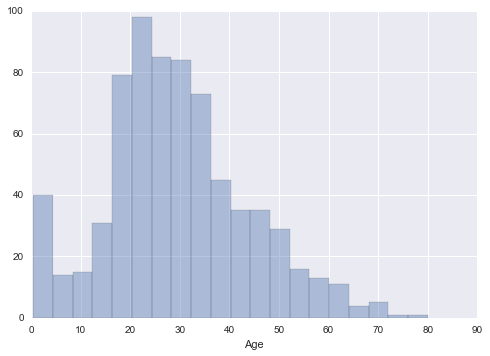

In [70]:
# Plot of non-null age
sns.distplot(titanic_data[pd.notnull(titanic_data['Age'])]['Age'], kde=False)

#### Possible Question

How did married couples fair? e.g. number both died, just one?

In [82]:
married = titanic_data[((titanic_data['SibSp'] > 0) & (titanic_data['Age'] > 18))]
married.shape

(165, 12)

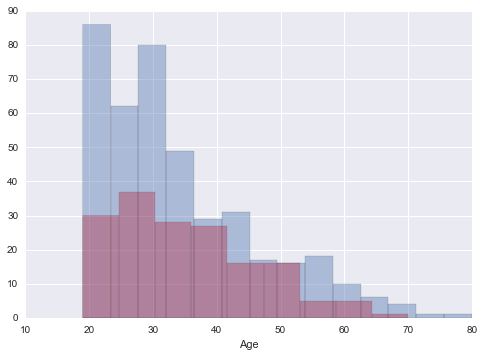

In [95]:
sns.distplot(married[pd.notnull(married['Age'])]['Age'], kde=False, color='r')

not_married = titanic_data[((titanic_data['SibSp'] == 0) & (titanic_data['Age'] > 18))]
sns.distplot(not_married[pd.notnull(not_married['Age'])]['Age'], kde=False)